<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/Assignment_07_20150711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data-kmeans.csv')
data = dataset.values
label = np.random.randint(5, size = (200,1))
data = np.append(data, label, axis = 1)

In [83]:
def compute_distance(a,b):
  dist = np.sqrt(np.sum((a-b) ** 2, axis = 1))
  return dist

def compute_centroid(Z):
  center = []
  ca = center.append
  for i in range(5):
    tmp = Z[Z[:,2] == i][:, :2]
    ca(np.sum(tmp,axis = 0) / len(tmp))
  return np.array(center)

#z individual point
def compute_label(z,M):
  label = np.argmin(compute_distance(z,M))
  return label

#Data is a data and M is set of centroids
def compute_loss(Data,M):
  loss = 0
  length = len(Data)
  for i in range(5):
    loss += np.sum(compute_distance(Data[Data[:,2] == i][:,:2],M[i]))
  return loss / length

In [84]:
#implement Kmeans Algorithm
def kmeans(Data, max_iter):
  length = len(Data)
  loss_iter = []
  M_iter = []
  for i in range(max_iter):
    M = compute_centroid(Data)
    M_iter.append(M)
    loss = compute_loss(Data,M)
    loss_iter.append(loss)
    for i in range(length):
      Data[i,2] = compute_label(Data[i][:2],M)
  return Data, loss_iter, M_iter

In [85]:
#running Kmeans
result, L_iter, M_iter = kmeans(data, 30)

In [ ]:
#calculate moving centroids
centroid = []
for i in range(len(M_iter)):
  centroid.append(compute_distance(M_iter[i],[0,0]))
centroid = np.array(centroid)

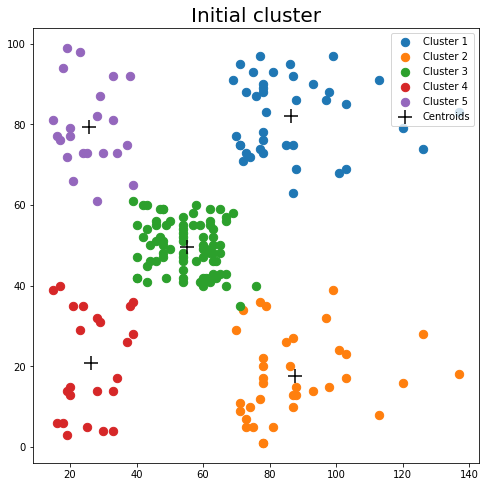

In [87]:
plt.figure(figsize = (8,8))
for i in range(5):
  tmp = result[result[:,2]==i][:, :2]
  plt.scatter(tmp[:,0],tmp[:,1], s = 70, label = "Cluster "+str(i+1))
plt.scatter(M_iter[-1][:,0],M_iter[-1][:,1],c = "black", marker = "+", s = 200, label = "Centroids")
plt.title("Initial cluster", fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

# **[Output] Plot the data points**

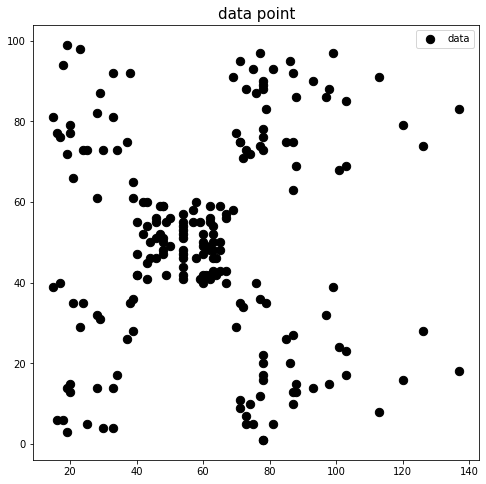

In [69]:
plt.figure(figsize = (8,8))
plt.scatter(data[:,0],data[:,1], c = "black", s = 70, label = "data")
plt.title("data point", fontsize = 15)
plt.legend(loc = "upper right")
plt.show()

# **[Output] Visualize the initial condition of the point labels**

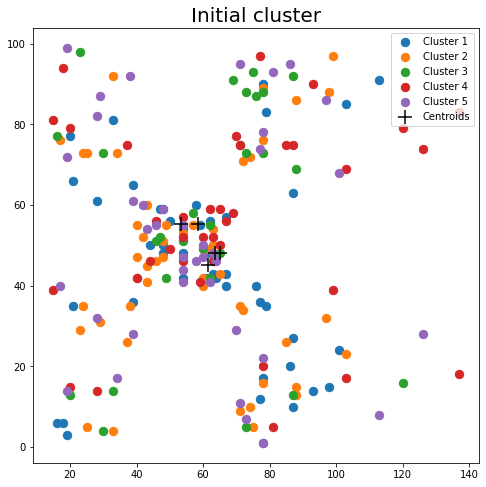

In [70]:
plt.figure(figsize = (8,8))
for i in range(5):
  tmp = data[data[:,2]==i][:, :2]
  plt.scatter(tmp[:,0],tmp[:,1], s = 70, label = "Cluster "+str(i+1))
plt.scatter(center[:,0],center[:,1],c = "black", marker = "+", s = 200, label = "Centroids")
plt.title("Initial cluster", fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

# **[Output] Plot the loss curve**

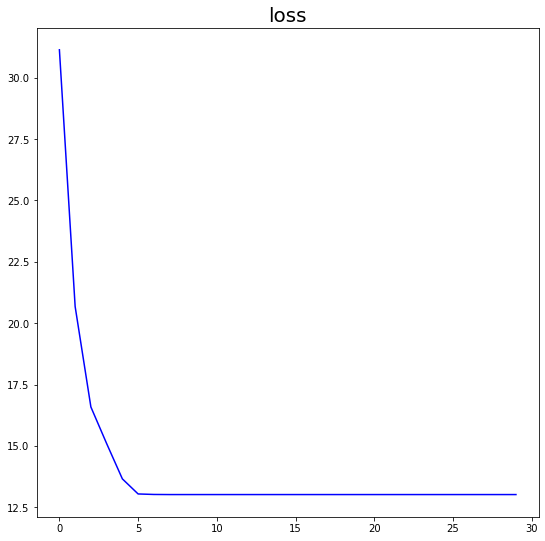

In [88]:
#plot the loss curve
plt.figure(figsize = (9,9))
plt.plot(L_iter, c = "blue")
plt.title("loss", fontsize = 20)
plt.show()